In [1]:
# Reading in the initial data

import pandas as pd

weather = pd.read_csv("local_weather.csv", index_col="DATE")

In [2]:
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16859 entries, 1960-01-01 to 2022-01-28
Data columns (total 35 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  16859 non-null  object 
 1   NAME     16859 non-null  object 
 2   ACMH     5844 non-null   float64
 3   ACSH     5844 non-null   float64
 4   AWND     8051 non-null   float64
 5   DAPR     8 non-null      float64
 6   FMTM     2190 non-null   float64
 7   FRGT     2 non-null      float64
 8   MDPR     8 non-null      float64
 9   PGTM     8512 non-null   float64
 10  PRCP     16578 non-null  float64
 11  SNOW     11380 non-null  float64
 12  SNWD     11504 non-null  float64
 13  TAVG     2037 non-null   float64
 14  TMAX     16850 non-null  float64
 15  TMIN     16849 non-null  float64
 16  TSUN     1151 non-null   float64
 17  WDF1     5844 non-null   float64
 18  WDF2     8052 non-null   float64
 19  WDF5     7965 non-null   float64
 20  WDFG     4267 non-null   float64
 21  WSF

Here are the primary columns that we need:

PRCP — total precipitation

TMAX — maximum daily temperature

TMIN — minimum daily temperature

SNOW — the total daily snowfall

SNWD — total snow depth on the ground

In [4]:
listed_columns = weather[['PRCP','TMAX','TMIN','SNOW','SNWD']].copy()

In [5]:
listed_columns.rename({'PRCP':'total_precipitation',
                      'TMAX':'max_daily_temp',
                      'TMIN':'min_daily_temp',
                       'SNOW':'total_daily_snowfall',
                      'SNWD':'total_snow_depth_on_ground'},axis = 1,
                        inplace = True)

In [6]:
listed_columns

,total_precipitation,max_daily_temp,min_daily_temp,total_daily_snowfall,total_snow_depth_on_ground
DATE,,,,,
1960-01-01,0.0,49.0,30.0,0.0,0.0
1960-01-02,0.0,49.0,29.0,0.0,0.0
1960-01-03,0.0,54.0,35.0,0.0,0.0
1960-01-04,0.0,54.0,36.0,0.0,0.0
1960-01-05,0.0,55.0,33.0,0.0,0.0
...,...,...,...,...,...
2022-01-24,0.0,60.0,39.0,NaN,NaN
2022-01-25,0.0,57.0,43.0,NaN,NaN
2022-01-26,0.0,57.0,41.0,NaN,NaN


In [7]:
listed_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16859 entries, 1960-01-01 to 2022-01-28
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   total_precipitation         16578 non-null  float64
 1   max_daily_temp              16850 non-null  float64
 2   min_daily_temp              16849 non-null  float64
 3   total_daily_snowfall        11380 non-null  float64
 4   total_snow_depth_on_ground  11504 non-null  float64
dtypes: float64(5)
memory usage: 790.3+ KB


In [8]:
listed_columns.drop(['total_daily_snowfall', 'total_snow_depth_on_ground'], axis = 1, inplace = True)

In [9]:
listed_columns

,total_precipitation,max_daily_temp,min_daily_temp
DATE,,,
1960-01-01,0.0,49.0,30.0
1960-01-02,0.0,49.0,29.0
1960-01-03,0.0,54.0,35.0
1960-01-04,0.0,54.0,36.0
1960-01-05,0.0,55.0,33.0
...,...,...,...
2022-01-24,0.0,60.0,39.0
2022-01-25,0.0,57.0,43.0
2022-01-26,0.0,57.0,41.0


In [10]:
listed_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16859 entries, 1960-01-01 to 2022-01-28
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_precipitation  16578 non-null  float64
 1   max_daily_temp       16850 non-null  float64
 2   min_daily_temp       16849 non-null  float64
dtypes: float64(3)
memory usage: 526.8+ KB


In [11]:
listed_columns = listed_columns.fillna(method="ffill")

In [12]:
listed_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16859 entries, 1960-01-01 to 2022-01-28
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_precipitation  16859 non-null  float64
 1   max_daily_temp       16859 non-null  float64
 2   min_daily_temp       16859 non-null  float64
dtypes: float64(3)
memory usage: 526.8+ KB


In [13]:
listed_columns

,total_precipitation,max_daily_temp,min_daily_temp
DATE,,,
1960-01-01,0.0,49.0,30.0
1960-01-02,0.0,49.0,29.0
1960-01-03,0.0,54.0,35.0
1960-01-04,0.0,54.0,36.0
1960-01-05,0.0,55.0,33.0
...,...,...,...
2022-01-24,0.0,60.0,39.0
2022-01-25,0.0,57.0,43.0
2022-01-26,0.0,57.0,41.0


In [14]:
listed_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16859 entries, 1960-01-01 to 2022-01-28
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_precipitation  16859 non-null  float64
 1   max_daily_temp       16859 non-null  float64
 2   min_daily_temp       16859 non-null  float64
dtypes: float64(3)
memory usage: 526.8+ KB


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

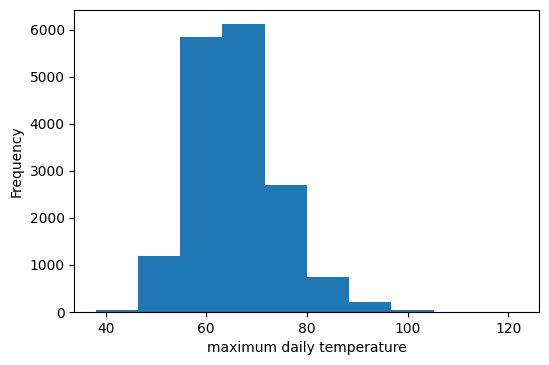

In [16]:
plt.hist(listed_columns['max_daily_temp'])
plt.xlabel("maximum daily temperature")
plt.ylabel("Frequency")
plt.show()

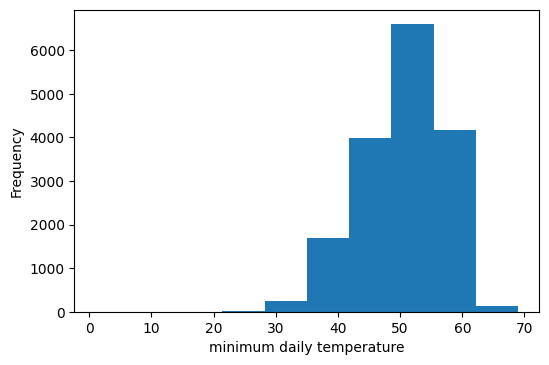

In [17]:
plt.hist(listed_columns['min_daily_temp'])
plt.xlabel("minimum daily temperature")
plt.ylabel("Frequency")
plt.show()

In [20]:
listed_columns['max_daily_temp'].drop(listed_columns['max_daily_temp'].tail(16859).index,inplace=True)

In [68]:
y = listed_columns[['max_daily_temp']]
X = listed_columns[['total_precipitation', 'min_daily_temp']]

In [69]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16859 entries, 1960-01-01 to 2022-01-28
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_precipitation  16859 non-null  float64
 1   min_daily_temp       16859 non-null  float64
dtypes: float64(2)
memory usage: 1.0+ MB


In [70]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [72]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [73]:
y_pred = ridge.predict(X_test)

In [74]:
y_pred

array([[68.00961642],
       [55.73421427],
       [51.81371252],
       ...,
       [65.78467722],
       [70.42335243],
       [59.71210061]])

In [75]:
y_test_value = y_test.copy()

In [76]:
from sklearn.metrics import mean_squared_error, r2_score
acc = mean_squared_error(y_test_value, y_pred)

In [77]:
acc

40.06433465291906

In [78]:
r2 = r2_score(y_test, y_pred)

In [79]:
r2

0.43347410200045133

In [80]:
y_test_value['Prediction']= y_pred

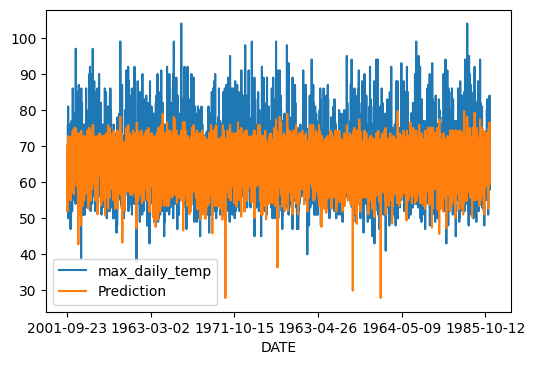

In [82]:
y_test_value.plot()

In [69]:
y

,total_precipitation,min_daily_temp,y_hat
3916,0.00,55.0,NaN
16173,0.00,49.0,NaN
3438,0.00,58.0,NaN
15885,0.00,54.0,NaN
3963,0.18,55.0,NaN
...,...,...,...
15916,0.00,57.0,NaN
13717,0.00,50.0,NaN
7703,0.00,60.0,NaN
6594,0.00,46.0,NaN
